# In this notebook, we will be analyzing if there is a trend towards a lower or higher percentage of unemployment when there are being more patents being made throughout the years. If there are any dips, will we see any dips that happen in the other dataset?

In [2]:
# Here, we are going to load the generic g_patent and g_cpc_current DataFrames as well as our pandas, matplotlib etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set( style = 'white' )

In [3]:
# Here is a variable change in the width of the string for the columns. I am placing it here as it may need
# to be changed often, so I will move it right here!
pd.options.display.max_colwidth = 1000

In [4]:
df_patent = pd.read_csv("g_patent.tsv", delimiter='\t', dtype={'patent_id': str, 
                                                        'patent_type': str, 
                                                        'patent_title': str,
                                                        'patent_abstract': str,
                                                        'wipo_kind': str,
                                                        'num_claims': int,
                                                        'withdrawn': int,
                                                        'filename': str}, parse_dates=[2])
df_patent.head(20)

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature detection,"A frequency modulated (coherent) laser detection and ranging system includes a read-out integrated circuit formed with a two-dimensional array of detector elements each including a photosensitive region receiving both return light reflected from a target and light from a local oscillator, and local processing circuitry sampling the output of the photosensitive region four times during each sample period clock cycle to obtain quadrature components. A data bus coupled to one or more outputs of each of the detector elements receives the quadrature components from each of the detector elements for each sample period and serializes the received quadrature components. A processor coupled to the data bus receives the serialized quadrature components and determines an amplitude and a phase for at least one interfering frequency corresponding to interference between the return light and the local oscillator light using the quadrature components.",B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness control method,"The injection molding machine includes a fixed platen, a moveable platen moving forward and backward by a toggle link, a base plate supporting the toggle link, a driving part for mold clamping to operate the toggle link, a driving part for mold thickness adjustment to adjust a mold thickness, and a control unit to calculate a movement distance gap before a clamping process by controlling the driving part for mold thickness adjustment to move the base plate backward and then move the base plate forward to a target movement position based on a fold amount of the toggle link, and control the driving part for mold thickness adjustment using a value obtained by deducting the movement distance gap from the fold amount of the toggle link when producing a clamp force.",B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-extruded film,"The present invention relates to: a method for manufacturing a polymer film, the method including a base film forming step for co-extruding a first resin containing a polyamide-based resin and a second resin containing a copolymer including polyamide-based segments and polyether-based segments; a co-extruded film including a base film including a first resin layer containing a polyamide-based resin, and a second resin layer containing a copolymer having polyamide-based segments and polyether-based segments; to a co-extruded film including a base film including a first resin layer and a second resin layer, which have different melting points; and to a method for manufacturing a polymer film, the method including a base film forming step including a step of co-extruding a first resin and a second resin, which have different melting points.",B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermoplastic,"The invention relates to a method for producing a container (2) from a thermoplastic, having at least one surround (4), provided in the container wall (1), for a container opening. The surround (4) comprises a structure behind which parts of the container wall (1) extend and/or which is penetrated by said parts. The method is carried out using a multi-part blow mold that has at least two mold parts, each having at least one cavity, wherein the surround is placed as an insert in the cavity (10) of the blow mold (7). The method comprises pressing the preform that has been forced into the cavity (10) into the structure of the surround (4) by means of a tool which is brought to bear on the preform (12) on the side of the preform facing away from the cavity (10).",B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, co-extruded, and of low thickness mad

In [5]:
df_cpc = pd.read_table("g_cpc_current.tsv", delimiter="\t", dtype={"patent_id": int,
                                                               "cpc_sequence": int,
                                                               "cpc_section": str,
                                                               "cpc_subclass": str,
                                                               "cpc_group": str,
                                                               "cpc_type": str,
                                                               "cpc_symbol_position": str})
df_cpc.head(20)

,patent_id,cpc_sequence,cpc_section,cpc_class,cpc_subclass,cpc_group,cpc_type,cpc_symbol_position
0,4796895,1,F,F16,F16H,F16H61/00,inventional,NaN
1,10913199,0,B,B29,B29C,B29C55/08,inventional,NaN
2,5208443,0,B,B29,B29C,B29C65/366,inventional,NaN
3,7830588,6,G,G09,G09G,G09G2310/0275,additional,NaN
4,7232943,1,A,A01,A01H,A01H5/10,inventional,NaN
5,10815370,2,C,C08,C08F,C08F265/08,inventional,NaN
6,8271025,4,H,H04,H04M,H04M15/00,inventional,NaN
7,8208778,1,G,G02,G02B,G02B6/12002,inventional,NaN
8,10299603,18,B,B64,B64D,B64D11/00154,inventional,NaN
9,10941581,24,B,B32,B32B,B32B2255/10,additional,NaN


In [60]:
df_unemployment = pd.read_csv("aat1.csv", skiprows=range(1,37))
df_unemployment.set_index('year', inplace=True)
df_unemployment.drop(inplace=True,columns=df_unemployment.columns[:8])
df_unemployment.drop(inplace=True,columns=df_unemployment.columns[1:])
df_unemployment

,unemployed_percent
year,
1976,7.7
1977,7.1
1978,6.1
1979,5.8
1980,7.1
1981,7.6
1982,9.7
1983,9.6
1984,7.5


In [43]:
ppy = df_patent.groupby([df_patent['patent_date'].dt.year.rename('year')]).agg({'count'}).iloc[:-12]
ppy.drop(inplace=True, columns=ppy.columns[:-1])
ppy['filename']['count'] = ppy['filename']['count'].astype(int)
ppy['filename']['count'].div(1000)
ppy = ppy['filename']

<Axes: title={'center': 'Comparing Patents Per Year and Unemployment Percent'}, xlabel='Year', ylabel='Patents Per 10k /Unemployment percentage'>

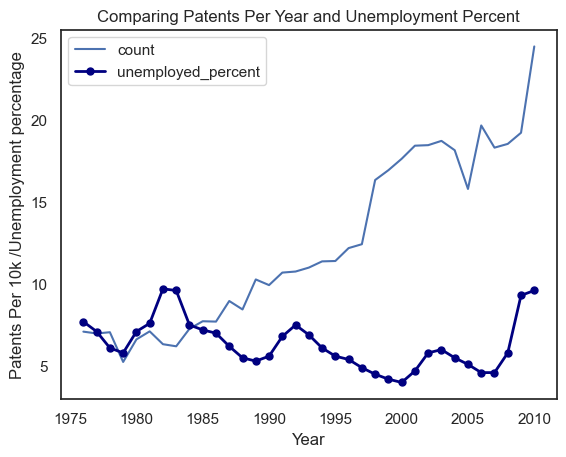

In [66]:
ax = ppy.div(10000).plot()
ax = df_unemployment.plot(ax=ax, lw=2, colormap='jet', marker='.', markersize=10, title='Comparing Patents Per Year and Unemployment Percent')
ax.set(xlabel="Year", ylabel="Patents Per 10k /Unemployment percentage")
ax

<Axes: title={'center': 'Comparing Granted Patents Per Year and The Population Number in thousands of the USA'}, xlabel='Year', ylabel='Patents Per Year / Population Size of America'>

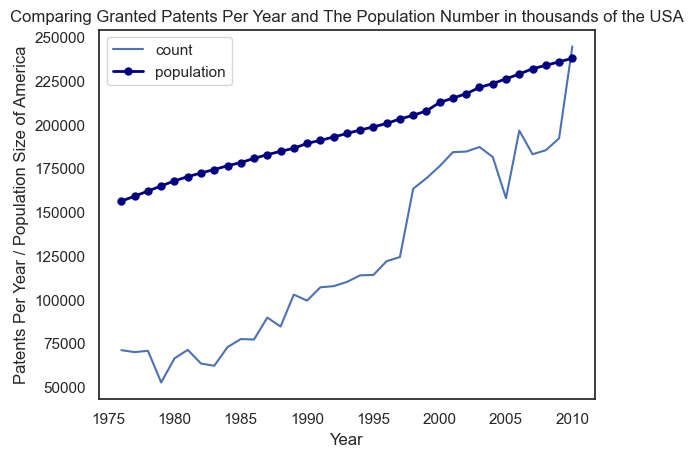

In [74]:
df_unemployment = pd.read_csv("aat1.csv", skiprows=range(1,37))
df_unemployment.set_index('year', inplace=True)
df_unemployment.drop(inplace=True, columns=df_unemployment.columns[1:])
ppy = df_patent.groupby([df_patent['patent_date'].dt.year.rename('year')]).agg({'count'}).iloc[:-12]
ppy.drop(inplace=True, columns=ppy.columns[:-1])
ppy['filename']['count'] = ppy['filename']['count'].astype(int)
ppy['filename']['count'].div(1000)
ppy = ppy['filename']
ax = ppy.plot()
ax = df_unemployment.plot(ax=ax, lw=2, colormap='jet', marker='.', markersize=10, title='Comparing Granted Patents Per Year and The Population Number in thousands of the USA')
ax.set(xlabel="Year", ylabel="Patents Per Year / Population Size of America")
ax